<a href="https://colab.research.google.com/github/Balajivasudevan03/Intro-to-NN-and-ML/blob/main/Intro_to_ML_and_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9984137033837978
-0.021961721875299798


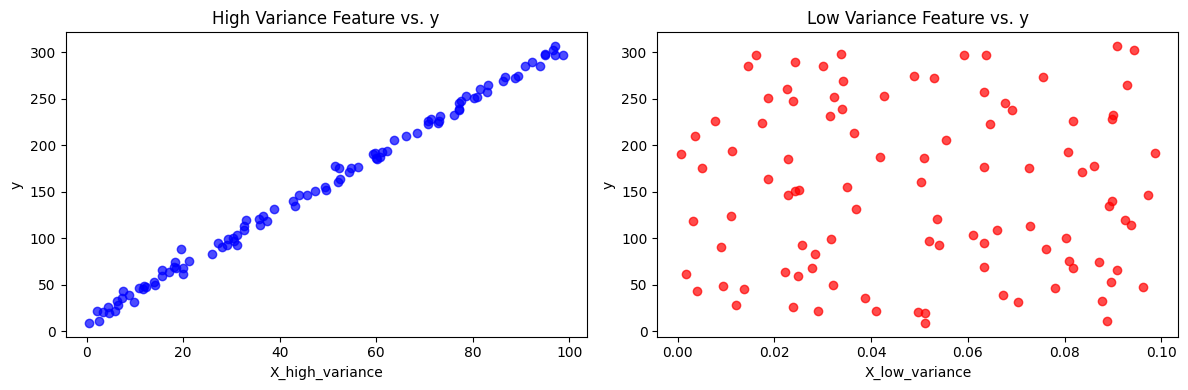

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ------------------------------
# 1. Generate Dummy Data
# ------------------------------
np.random.seed(42)
N = 100

X_high_variance = np.random.rand(N) * 100
X_high_variance

X_low_variance = np.random.rand(N) * 0.1
X_low_variance

y = 3.0 * X_high_variance + 0.5 * X_low_variance + 10 + np.random.randn(N) * 5
y

df = pd.DataFrame({
    'X_high_variance': X_high_variance,
    'X_low_variance': X_low_variance,
    'y': y
})

df

model = LinearRegression()
model.fit(df[['X_high_variance', 'X_low_variance']], df['y'])

#print("Learned coefficients (slope):", model.coef_)
#print("Intercept (bias):", model.intercept_)

corr_high = np.corrcoef(X_high_variance, y)[0,1]
corr_low  = np.corrcoef(X_low_variance, y)[0,1]

print(corr_high)
print(corr_low)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(X_high_variance, y, color='blue', alpha=0.7)
axes[0].set_title("High Variance Feature vs. y")
axes[0].set_xlabel("X_high_variance")
axes[0].set_ylabel("y")

axes[1].scatter(X_low_variance, y, color='red', alpha=0.7)
axes[1].set_title("Low Variance Feature vs. y")
axes[1].set_xlabel("X_low_variance")
axes[1].set_ylabel("y")

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
N = 100  # number of samples
X1 = np.random.rand(N) * 10  # feature 1
X2 = np.random.rand(N) * 5   # feature 2

# True parameters (for the synthetic data)
true_w = np.array([2.0, -1.0])  # weights for X1 and X2
true_b = 5.0                    # intercept (bias)

# Generate target with some noise
y = true_w[0]*X1 + true_w[1]*X2 + true_b + np.random.randn(N)*2.0

# Reshape X to be a 2D array of shape (N, 2)
X = np.vstack((X1, X2)).T  # shape => (100, 2)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (100, 2)
y shape: (100,)


In [3]:
def predict(X, w, b):
    """
    X: (N, d) matrix of input features
    w: (d,) weight vector
    b: scalar bias
    """
    return X.dot(w) + b



def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)


def compute_gradients(X_batch, y_batch, w, b):
    """
    Compute gradient for one batch.
    """
    M = len(y_batch)  # size of this batch
    y_pred = predict(X_batch, w, b)
    error = y_pred - y_batch

    dw = (2/M) * X_batch.T.dot(error)  # shape (d,)
    db = (2/M) * np.sum(error)         # scalar
    return dw, db


def batch_gradient_descent(X, y, lr=0.001, epochs=100):
    # Initialize parameters
    d = X.shape[1]
    w = np.zeros(d)
    b = 0.0

    cost_history = []
    w_history = []
    b_history = []

    for epoch in range(epochs):
        # Compute gradients using ALL data
        dw, db = compute_gradients(X, y, w, b)

        # Parameter update
        w -= lr * dw
        b -= lr * db

        # Record cost and parameters
        cost = mean_squared_error(predict(X, w, b), y)
        cost_history.append(cost)
        w_history.append(w.copy())
        b_history.append(b)

    return w, b, cost_history, w_history, b_history



def stochastic_gradient_descent(X, y, lr=0.001, epochs=100):
    d = X.shape[1]
    w = np.zeros(d)
    b = 0.0

    cost_history = []
    w_history = []
    b_history = []

    N = len(y)

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(N):
            X_i = X_shuffled[i].reshape(1, -1)  # shape (1, d)
            y_i = y_shuffled[i].reshape(-1)     # shape (1,)

            # Compute gradient for one sample
            dw, db = compute_gradients(X_i, y_i, w, b)

            # Update
            w -= lr * dw
            b -= lr * db

        # Record cost and parameters after each epoch
        cost = mean_squared_error(predict(X, w, b), y)
        cost_history.append(cost)
        w_history.append(w.copy())
        b_history.append(b)

    return w, b, cost_history, w_history, b_history




def mini_batch_gradient_descent(X, y, lr=0.001, epochs=100, batch_size=16):
    d = X.shape[1]
    w = np.zeros(d)
    b = 0.0

    cost_history = []
    w_history = []
    b_history = []

    N = len(y)

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process batches
        print("Iteration no: ", epoch)
        for start in range(0, N, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            print("\tstart: {}, end: {}".format(start, end))

            dw, db = compute_gradients(X_batch, y_batch, w, b)

            w -= lr * dw
            b -= lr * db

        # Record cost and parameters after each epoch
        cost = mean_squared_error(predict(X, w, b), y)
        cost_history.append(cost)
        w_history.append(w.copy())
        b_history.append(b)

        print('\n\n')
    return w, b, cost_history, w_history, b_history


# Hyperparameters
LR = 0.01
EPOCHS = 50
BATCH_SIZE = 10

# 6.1 Run Batch GD
w_bgd, b_bgd, cost_bgd, w_hist_bgd, b_hist_bgd = batch_gradient_descent(
    X, y, lr=LR, epochs=EPOCHS
)

print(w_bgd, b_bgd, cost_bgd, w_hist_bgd, b_hist_bgd)
## 6.2 Run Stochastic GD
#w_sgd, b_sgd, cost_sgd, w_hist_sgd, b_hist_sgd = stochastic_gradient_descent(
#    X, y, lr=LR, epochs=EPOCHS
#)

# 6.3 Run Mini-Batch GD
#w_mbgd, b_mbgd, cost_mbgd, w_hist_mbgd, b_hist_mbgd = mini_batch_gradient_descent(
    #X, y, lr=LR, epochs=EPOCHS, batch_size=BATCH_SIZE
#)

print("Final parameters (Batch)     :", w_bgd, b_bgd)
#print("Final parameters (Stochastic):", w_sgd, b_sgd)
#print("Final parameters (Mini-Batch):", w_mbgd, b_mbgd)


[2.25102694 0.05469457] 0.8433331799337642 [21.531003812735893, 9.420022880057177, 8.331663091311546, 8.069462720686303, 7.8898874985287195, 7.735913786589374, 7.600755774826075, 7.481632705293334, 7.376364882099205, 7.283084517773651, 7.200178347661709, 7.126252003332213, 7.060100233857825, 7.000681241059331, 6.947094502279157, 6.898561602543248, 6.854409667438433, 6.814057043814438, 6.777000923324093, 6.74280664519759, 6.7110984504124955, 6.68155149033439, 6.653884919621666, 6.627855926281737, 6.603254571726041, 6.579899330923321, 6.557633237661992, 6.536320552820423, 6.515843884683555, 6.496101699972221, 6.477006172573399, 6.458481324152115, 6.440461417042635, 6.422889565189625, 6.405716533554417, 6.388899700415366, 6.372402160460956, 6.356191949572851, 6.3402413747880635, 6.324526435169565, 6.309026321250895, 6.293722982393857, 6.278600752844925, 6.263646028526073, 6.248846987676453, 6.234193349395232, 6.219676164943179, 6.205287637358303, 6.191020965543945, 6.1768702095088495] [ar

In [4]:
# Create a grid of (w1, w2) values
w1_vals = np.linspace(-2, 6, 100)
w2_vals = np.linspace(-4, 2, 100)

W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Compute MSE for each (w1, w2) pair, with b=0
mse_grid = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w1_ = W1[i, j]
        w2_ = W2[i, j]
        # Predictions with b=0
        y_pred_ = X[:, 0]*w1_ + X[:, 1]*w2_
        # MSE
        mse_grid[i, j] = mean_squared_error(y_pred_, y)


w_hist_bgd = np.array(w_hist_bgd)   # shape => (epochs, 2)
#w_hist_sgd = np.array(w_hist_sgd)   # shape => (epochs, 2)
#w_hist_mbgd = np.array(w_hist_mbgd) # shape => (epochs, 2)
#print(w_hist_bgd)
#w_hist_bgd.shape

# Cars---24

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 21.6MB/s]


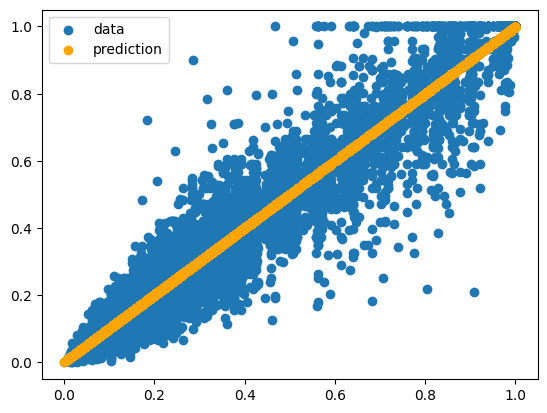

In [6]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

df.shape

df['make'].nunique()

df['model'].nunique()

df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()
#df.head()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

from sklearn.model_selection import train_test_split

y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

#X1
#X1_train
#X1_test

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

X1_train.shape

model.coef_

y_hat = model.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
X

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Code for multivariate!!!

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

model.coef_

model.score(X_train, y_train)

model.score(X_test, y_test)

#x1 = X_test[['model',"make"]]

#y_hat = model.predict(y)

#plt.scatter(x1,y)
#plt.scatter(x1,y_hat,color='orange')
#plt.show()

0.9458843076992296

Coefficients: [ 1.0820171  -2.79649823]
Intercept: -0.16353919156652297


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


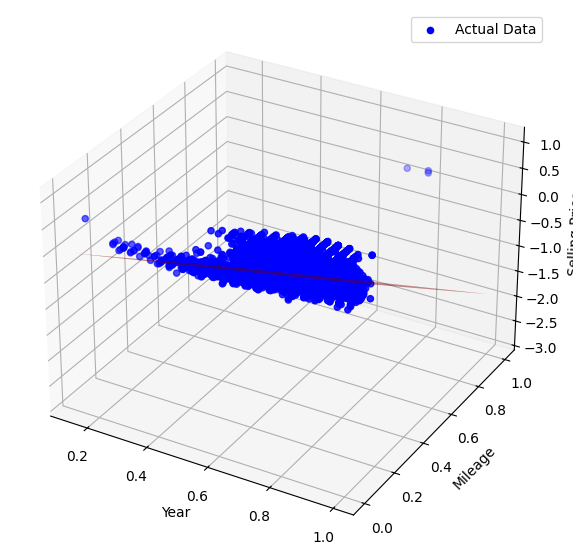

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selecting two features and target
X = df[['year', 'mileage']]  # Two independent variables
y = df['selling_price']      # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Making predictions
y_pred = model.predict(X_test)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X_train['year'], X_train['mileage'], y_train, color='blue', label='Actual Data')

# Creating a mesh grid for the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(X_train['year'].min(), X_train['year'].max(), 100),
                             np.linspace(X_train['mileage'].min(), X_train['mileage'].max(), 100))
z_surf = (model.coef_[0] * x_surf) + (model.coef_[1] * y_surf) + model.intercept_

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel("Year")
ax.set_ylabel("Mileage")
ax.set_zlabel("Selling Price")
plt.legend()
plt.show()



#More Than Two Features → No Direct Plot
When using more than two features, we can't plot it in 2D or 3D. Instead, we use: ✔ Residual Plot → Shows errors in prediction
✔ Pairplot → Compares all relationships
✔ Feature Importance Bar Chart (for feature selection)

In [10]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

df.shape

df['make'].nunique()

df['model'].nunique()

df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()
#df.head()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

from sklearn.model_selection import train_test_split

y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

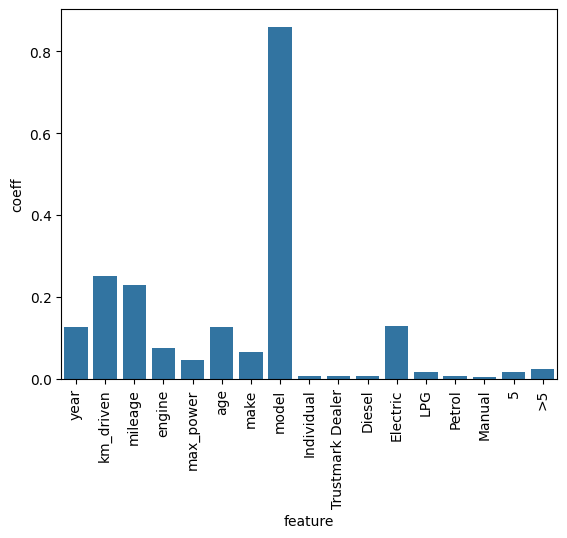

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model1 = LinearRegression()
model1.fit(X_train, y_train)

import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model1.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 54.6MB/s]


In [13]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [14]:
df.select_dtypes(['int', 'float']).columns

features = df.select_dtypes(['int', 'float']).columns.difference(['selling_price']).values
features

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df['selling_price'], test_size=0.2,
                                                    random_state=0)

print(X_train.shape)
print(y_train.shape)

print('\n')
print(X_test.shape)
print(y_test.shape)


# Let's start with standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# show computed statistics of scaler

print(scaler.mean_)
print(scaler.var_)

# use a linear regression model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)

reg.score(X_test_scaled, y_test)

(15856, 15)
(15856,)


(3964, 15)
(3964,)
[8.34258325e-01 1.52623613e-01 4.91864279e-01 2.52270434e-04
 3.93163471e-01 3.53178607e-03 8.01273966e-01 4.88458628e-01
 9.46014127e-03 8.44651867e+00 1.47719168e+03 5.82144605e+04
 9.81959968e+01 1.94833508e+01 2.01455348e+03]
[1.38271372e-01 1.29329645e-01 2.49933810e-01 2.52206794e-04
 2.38585956e-01 3.51931256e-03 1.59233998e-01 2.49866797e-01
 9.37064700e-03 1.02762770e+01 2.70045066e+05 2.73658602e+09
 2.01910014e+03 1.78248929e+01 1.02762770e+01]


0.7815105932042272

# addition of some random feature!!!

In [15]:
np.random.randn(X_train.shape[0], 1)

X_rand_train = np.random.randn(X_train.shape[0], 2)
X_rand_test  = np.random.randn(X_test.shape[0], 2)


X_train_enhanced = np.hstack([X_train, X_rand_train])
X_test_enhanced  = np.hstack([X_test,  X_rand_test])

# Let's start with standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_randn = scaler.fit_transform(X_train_enhanced)
X_test_scaled_randn = scaler.transform(X_test_enhanced)

# use a linear regression model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_scaled_randn, y_train)

reg.score(X_test_scaled_randn, y_test)

y_hat = reg.predict(X_test_scaled_randn)
Adj_R = 1 - ((1-reg.score(X_test_scaled_randn, y_test))*(len(y_test)-1)/(len(y_test)-X_test_scaled_randn.shape[1]-1))
print("Adjusted R-squared:", Adj_R )



Adjusted R-squared: 0.7805106429973394


# using OLS

In [16]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df['selling_price'], test_size=0.2, random_state=2)
y_train = np.array(y_train)


X_sm = sm.add_constant(X_train)
X_sm.head()

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

results.predict(X_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     3957.
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:45:18   Log-Likelihood:                -35598.
No. Observations:               15856   AIC:                         7.123e+04
Df Residuals:                   15841   BIC:                         7.134e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0003   3.21e-06  

,0
3443,8.498468
16090,4.247986
11070,8.982284
19214,6.640645
17843,5.953124
...,...
1099,13.556160
18898,5.489040
11798,7.947048
6637,13.725973


# Experiment--- 1
## for checking the magnitude of gradiants/weight co-efficients of importanat feature vs non-important feature  

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Some sample dummy data
np.random.seed(42)
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
X = np.column_stack((x1, x2))
W_true = np.array([3.0, 0.1])
noise = 0.1 * np.random.randn(N)
y = W_true[0]*x1 + W_true[1]*x2 + noise

# 2. Now defining Model, Loss, and Gradient
def predict(X, W):
    return X @ W

def compute_loss(X, W, y):
    preds = predict(X, W)
    error = preds - y
    mse = np.mean(error**2)
    return mse

def compute_gradient(X, W, y):
    preds = predict(X, W)
    error = preds - y
    grad = (2.0 / X.shape[0]) * (X.T @ error)
    return grad

# 3. Training Loop
W = np.zeros(2)
learning_rate = 0.1
num_epochs = 20

W_history = []
grad_history = []
loss_history = []

for epoch in range(num_epochs):
    loss = compute_loss(X, W, y)
    grad = compute_gradient(X, W, y)

    W_history.append(W.copy())
    grad_history.append(grad.copy())
    loss_history.append(loss)

    # Gradient Descent Update
    W -= learning_rate * grad

    if epoch % 5 == 0:
        print(f"Epoch {epoch}: loss={loss:.4f}, W={W}, grad={grad}")

print("\nFinal learned weights:", W)
print("True weights:", W_true)

Epoch 0: loss=7.5017, W=[ 0.49758407 -0.05427665], grad=[-4.97584074  0.54276653]
Epoch 5: loss=1.2575, W=[ 1.98306739 -0.09956141], grad=[-1.99999636 -0.0756518 ]
Epoch 10: loss=0.2335, W=[ 2.5866768 -0.0333655], grad=[-0.82031981 -0.14015623]
Epoch 15: loss=0.0529, W=[2.83667979 0.02513221], grad=[-0.34256844 -0.09824908]

Final learned weights: [2.92743697 0.05538391]
True weights: [3.  0.1]


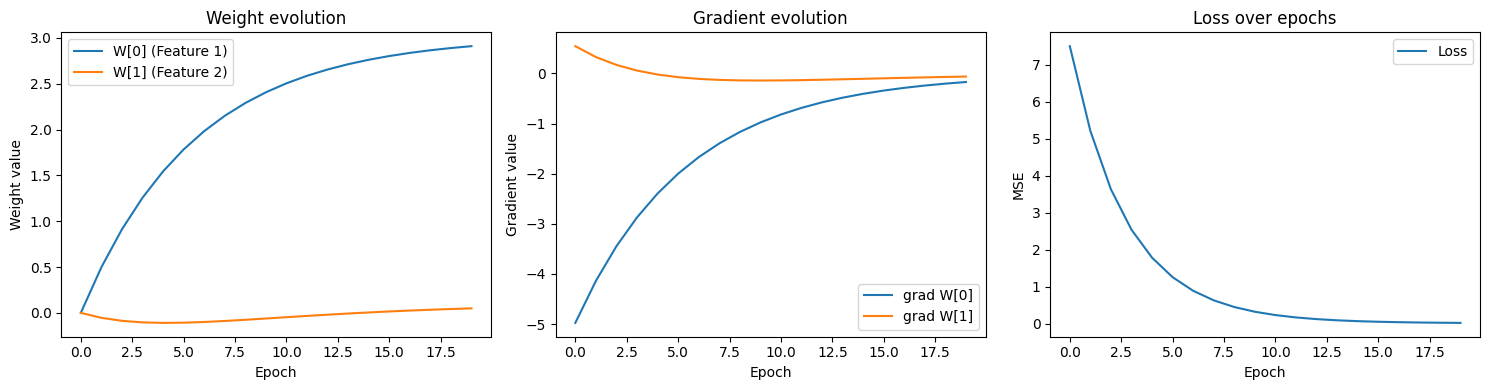

In [18]:
# 4. Visualize
W_history = np.array(W_history)
grad_history = np.array(grad_history)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Weights over epochs
axes[0].plot(W_history[:, 0], label='W[0] (Feature 1)')
axes[0].plot(W_history[:, 1], label='W[1] (Feature 2)')
axes[0].set_title("Weight evolution")
axes[0].legend()
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Weight value")

# Gradients
axes[1].plot(grad_history[:, 0], label='grad W[0]')
axes[1].plot(grad_history[:, 1], label='grad W[1]')
axes[1].set_title("Gradient evolution")
axes[1].legend()
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Gradient value")

# Loss
axes[2].plot(loss_history, label='Loss')
axes[2].set_title("Loss over epochs")
axes[2].legend()
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("MSE")

plt.tight_layout()
plt.show()


# Experiment --- 2

### checking the weight over standadize or non-standardized data

In [19]:
import numpy as np
import pandas as pd

np.random.seed(0)
X_large = np.random.randint(1000, 5000, 20)  # Feature with large values
X_small = np.random.randint(1, 5, 20)


y = 100 * X_large + 50000 * X_small # linear manipulation of features linearity

data = pd.DataFrame({
    'X_large': X_large,
    'X_small': X_small,
    'y': y
})

data.head()

weights = np.zeros(3)
learning_rate = 1e-8


num_iterations = 1000000


weight_history = []


X = np.c_[np.ones(X_large.shape[0]), X_large, X_small]
X

array([[1.000e+00, 3.732e+03, 3.000e+00],
       [1.000e+00, 3.607e+03, 4.000e+00],
       [1.000e+00, 2.653e+03, 4.000e+00],
       [1.000e+00, 4.264e+03, 3.000e+00],
       [1.000e+00, 1.835e+03, 1.000e+00],
       [1.000e+00, 1.763e+03, 2.000e+00],
       [1.000e+00, 2.731e+03, 2.000e+00],
       [1.000e+00, 4.431e+03, 2.000e+00],
       [1.000e+00, 2.033e+03, 2.000e+00],
       [1.000e+00, 4.795e+03, 1.000e+00],
       [1.000e+00, 1.277e+03, 2.000e+00],
       [1.000e+00, 2.778e+03, 1.000e+00],
       [1.000e+00, 2.828e+03, 4.000e+00],
       [1.000e+00, 3.647e+03, 1.000e+00],
       [1.000e+00, 4.142e+03, 4.000e+00],
       [1.000e+00, 4.544e+03, 2.000e+00],
       [1.000e+00, 3.648e+03, 3.000e+00],
       [1.000e+00, 4.468e+03, 4.000e+00],
       [1.000e+00, 3.362e+03, 4.000e+00],
       [1.000e+00, 1.705e+03, 1.000e+00]])

In [20]:
for i in range(num_iterations):
      predictions = X @ weights # here @ is matrix multiplication
      errors = predictions - y
      gradients = (2 / len(y)) * X.T @ errors
      weights -= learning_rate * gradients
      weight_history.append(weights.copy())

weight_history_df = pd.DataFrame(weight_history, columns=['Intercept', 'Weight_X_large', 'Weight_X_small'])
print("Final error: ", np.mean(errors**2))
without_norm_error = np.mean(errors**2)

Final error:  3461022533.84579


In [21]:
weight_history_df.head()
weight_history_df.tail()

,Intercept,Weight_X_large,Weight_X_small
999995,146.140819,135.503865,1447.586973
999996,146.140963,135.503864,1447.588399
999997,146.141106,135.503863,1447.589825
999998,146.141250,135.503861,1447.591251
999999,146.141394,135.503860,1447.592677


# what if i standadize the data

In [22]:
X_large_std = (X_large - np.mean(X_large)) / np.std(X_large)
X_small_std = (X_small - np.mean(X_small)) / np.std(X_small)
X_std = np.c_[np.ones(X_large.shape[0]), X_large_std, X_small_std]

# Re-initialize weights
weights_std = np.zeros(3)
learning_rate_std = 0.01 # Larger learning rate since features are standardized
num_iterations = 1000


# Store weight history for standardized features
weight_history_std = []

# Gradient descent with standardized features
for i in range(num_iterations):
    predictions_std = X_std @ weights_std
    errors_std = predictions_std - y
    gradients_std = (2 / len(y)) * X_std.T @ errors_std
    weights_std -= learning_rate_std * gradients_std
    weight_history_std.append(weights_std.copy())

# Convert weight history to a DataFrame for visualization
weight_history_std_df = pd.DataFrame(weight_history_std, columns=['Intercept', 'Weight_X_large', 'Weight_X_small'])
with_norm_error = np.mean(errors_std**2)

weight_history_std_df.head()
weight_history_std_df.tail()

with_norm_error, without_norm_error # Compare final errors don't write in scientific notation

print(f'Without normalization: {without_norm_error:.2f}')
print(f'With normalization: {with_norm_error:.20f}')

Without normalization: 3461022533.85
With normalization: 0.00021147780024494996


### look for R2 score breakdow, reallly important for interviews!!!

#VIF/homo-skedasticity

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 108MB/s]


In [24]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

df["make"]=df.groupby(["make"])["selling_price"].transform("mean")
df["model"]=df.groupby(["model"])["selling_price"].transform("mean")

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()

df1=pd.DataFrame(min_max_scaler.fit_transform(df[['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5']]),columns=['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'])
df1["selling_price"]=df["selling_price"]

from sklearn.model_selection import train_test_split

y=df1["selling_price"]
df1.drop(columns=["selling_price"],inplace=True)

X_train,X_test,y_train,y_test= train_test_split(df1,y,test_size=0.2,random_state=10)

# Training the OLS model!!!

In [25]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.744e+04
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:45:57   Log-Likelihood:                -24406.
No. Observations:               15856   AIC:                         4.885e+04
Df Residuals:                   15839   BIC:                         4.898e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.921e+12   1.87e+12  

# Training the linaer regression model

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)
model.score(X_test, y_test)

0.9434454655180875

# R2 score checking!!!


In [27]:
## Calculating variance according to the mean model

y_mean = np.mean(y_test)
variance = np.sum((y_test - y_mean)**2) / len(y_test)

print(f"Variance according to the mean model: {variance:.2f}")

Variance according to the mean model: 22.76


In [28]:
# Calculating variance according to the linear regression model

y_pred = model.predict(X_test)
variance_lr = np.sum((y_pred - y_test)**2)/ len(y_test)

print(f"Variance according to the linear regression model: {variance_lr:.2f}")

Variance according to the linear regression model: 1.29


In [29]:
# Reduction in variance

reduction_in_variance = variance - variance_lr

print(f"Reduction in variance: {reduction_in_variance:.2f}")

Reduction in variance: 21.47


In [30]:
variance_explained = reduction_in_variance / variance

print(f"% of variance explained by the model: {variance_explained * 100:.5f}")

% of variance explained by the model: 94.34455


# VIF implementation!!!

In [31]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:45:57   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5834      0.009    729.235      0.0

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.29
10,Diesel,17.29
16,>5,13.04
15,5,11.75
3,engine,6.30
7,model,6.16
4,max_power,5.02
6,make,3.33


# try removing the feature, and re-calculate the vif, untill we found the right combination of features, and check for R2 score to know whaether it is going up or down!!!

Text(0.5, 1.0, 'Histogram of residuals')

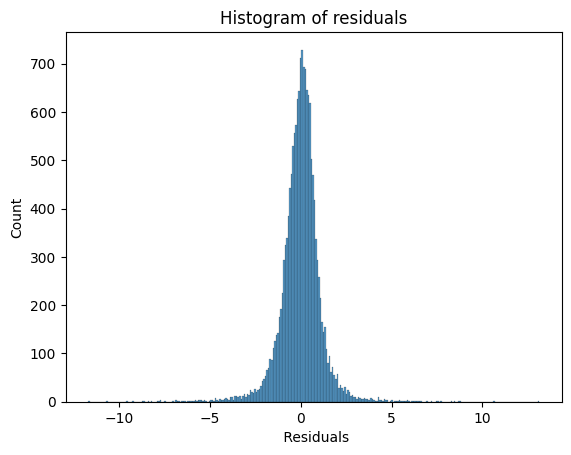

In [33]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

import seaborn as sns

sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [34]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


0.8901716755445364

Text(0.5, 1.0, 'Predicted values vs Residuals')

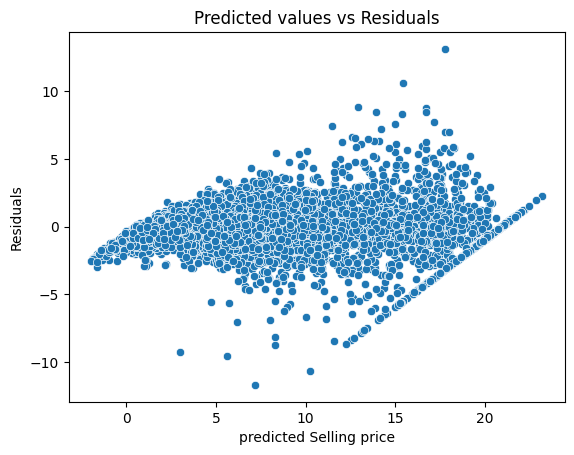

In [35]:
# Closer the value to 1, more is the normality.

Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [36]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:46:00   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5834      0.009  

In [37]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 0.9820837742976599), ('p-value', 0.7892904516044356)]

# Creating the dummy dataset!!!

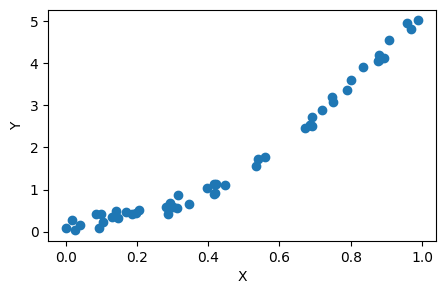

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [39]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score


# trying different order of features
# Fitting our linear model!!!

R2 score:  0.9345996128366808


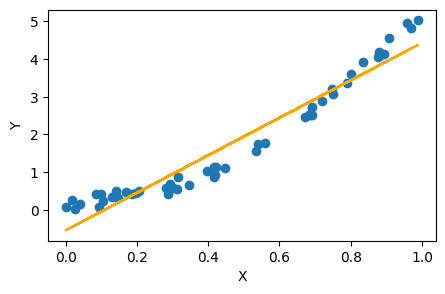

In [40]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output_1 = model.predict(X)
print('R2 score: ', r2_score(y, output_1))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output_1, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Trying order 2

Adj. R-square: 0.9947910474710182


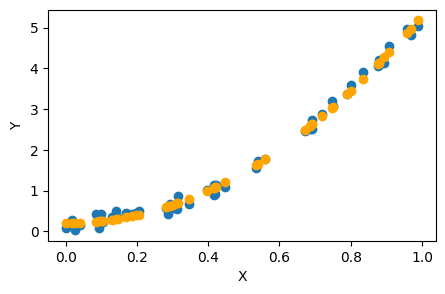

In [41]:
X_deg2 = np.hstack([X, X**2])
X_deg2[:5]

X_deg2 = np.hstack([X, X**2])
X_deg2[:5]

model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)

print('Adj. R-square:', adj_r(r2_score(y,output),X,y ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [42]:
model_deg2.coef_

array([[-0.08592053,  5.17031932]])

# Easier way to use polynomialfeature us to use the sklearn preprocessing!!!

In [43]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X)

X_poly[:5]

array([[1.00000000e+00, 4.17022005e-01, 1.73907352e-01],
       [1.00000000e+00, 7.20324493e-01, 5.18867376e-01],
       [1.00000000e+00, 1.14374817e-04, 1.30815988e-08],
       [1.00000000e+00, 3.02332573e-01, 9.14049845e-02],
       [1.00000000e+00, 1.46755891e-01, 2.15372915e-02]])

# iteratively checking for each order of x and checking the r2 score!!!

Adj. R-square for Model Degree1: 0.9318166176382416


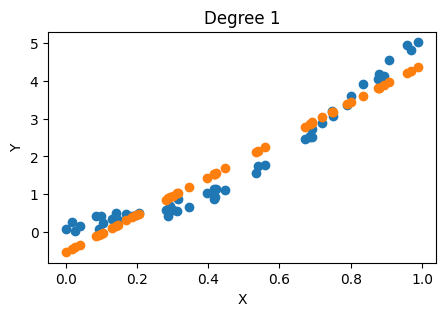

Adj. R-square for Model Degree2: 0.994564571274106


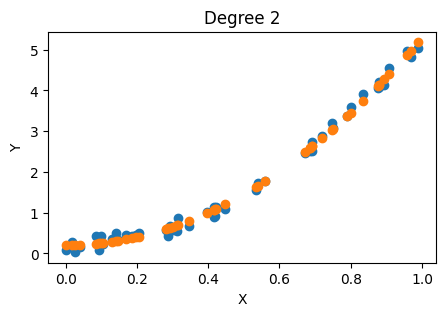

Adj. R-square for Model Degree3: 0.9944735532438161


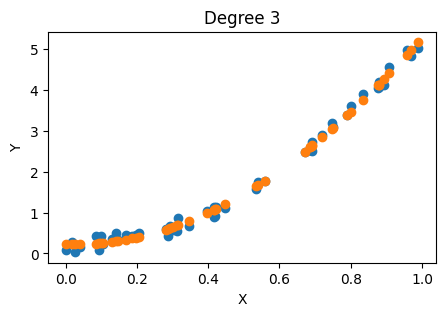

Adj. R-square for Model Degree4: 0.9954971261912255


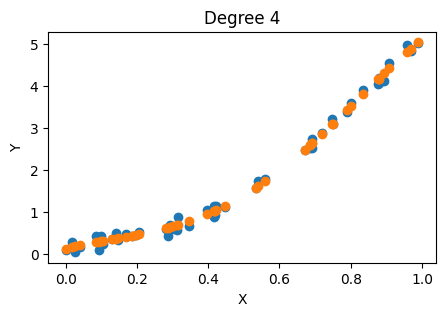

Adj. R-square for Model Degree5: 0.995442243943045


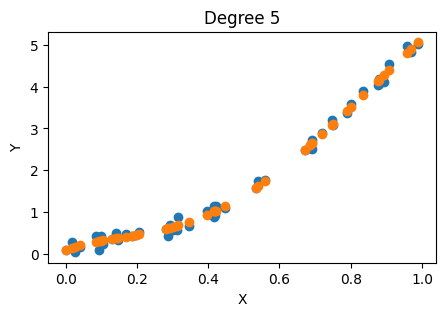

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []


# using degree 1 to 5
for i in range(1, 6):
  poly = PolynomialFeatures(i)

  X_poly = poly.fit_transform(X)

  scaler = StandardScaler()
  scaler.fit(X_poly)
  X_poly_scaled = scaler.transform(X_poly)


  #training model
  model = LinearRegression()
  model.fit(X_poly_scaled, y)

  #Prediction
  output = model.predict(X_poly_scaled)

  #Plotting
  value = adj_r(r2_score(y,output),X_poly_scaled,y )
  print(f'Adj. R-square for Model Degree{i}: {value}' )


  scores.append(value)

  fig = plt.figure(figsize=(5,3))
  plt.scatter(X, y, label="samples")
  plt.scatter(X, output, label="prediction")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(f"Degree {i}")
  plt.show()



In [45]:
scores

[0.9318166176382416,
 0.994564571274106,
 0.9944735532438161,
 0.9954971261912255,
 0.995442243943045]

# code for under fitting and overfitting

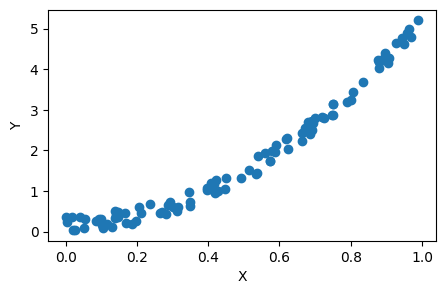

In [46]:
# lets first generate a dataset of 100 points this time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 100 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

  poly = PolynomialFeatures(degree)

  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.fit_transform(X_test)

  scaler.fit(X_poly_train)
  X_poly_scaled_train = scaler.transform(X_poly_train)
  X_poly_scaled_test = scaler.transform(X_poly_test)

  #training model
  polyreg_scaled = LinearRegression()
  polyreg_scaled.fit(X_poly_scaled_train, y_train)

  train_score = polyreg_scaled.score(X_poly_scaled_train, y_train)
  test_score = polyreg_scaled.score(X_poly_scaled_test, y_test)

  train_scores.append(train_score)
  test_scores.append(test_score)

  output1 = polyreg_scaled.predict(X_poly_scaled_train)
  output2 = polyreg_scaled.predict(X_poly_scaled_test)

  train_loss.append(mean_squared_error(y_train,output1))
  test_loss.append(mean_squared_error(y_test,output2))



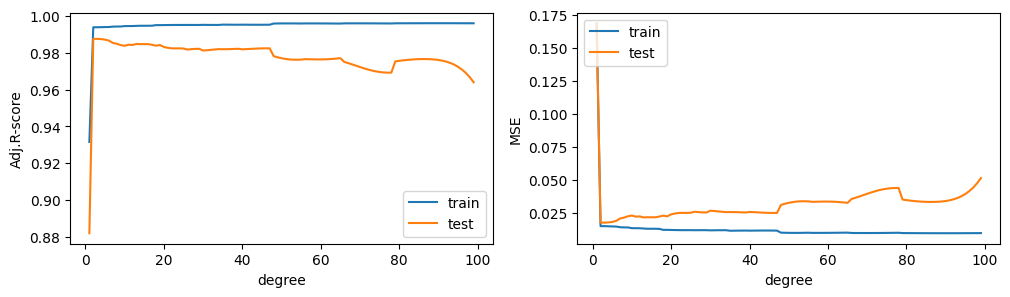

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 100)), train_scores, label="train")
axes[0].plot(list(range(1, 100)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 100)), train_loss, label="train")
axes[1].plot(list(range(1, 100)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()

# regularization and cross validation!!!
# over weight parameter!!!

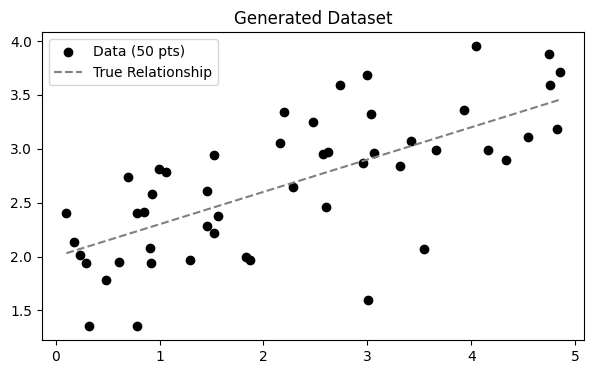

In [50]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate 50 points in [0, 5]
X = np.sort(5 * np.random.rand(50))
# True model: y = 2 + 0.3 x (just a simple line)
y_true = 2 + 0.3 * X
# Add some Gaussian noise
y_noisy = y_true + np.random.normal(loc=0, scale=0.5, size=len(X))

# Plot the generated data
plt.figure(figsize=(7,4))
plt.scatter(X, y_noisy, color='black', label='Data (50 pts)')
plt.plot(X, y_true, color='gray', linestyle='--', label='True Relationship')
plt.title("Generated Dataset")
plt.legend()
plt.show()

Coefficient for degree 0: -0.0
Coefficient for degree 1: 0.4
Coefficient for degree 2: 1.9


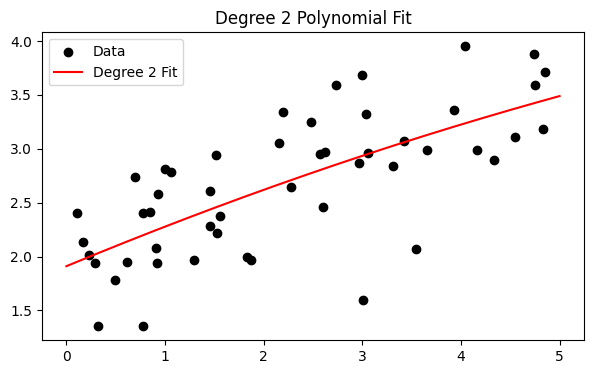

In [51]:
# Fit polynomial of degree 2
coeffs_deg2 = np.polyfit(X, y_noisy, deg=2)
poly_deg2 = np.poly1d(coeffs_deg2)

coeffs_deg2 = np.round(coeffs_deg2, decimals=1)

for degree, coeff in enumerate(coeffs_deg2):
	print(f"Coefficient for degree {degree}: {coeff}")

# Smooth evaluation for plotting
X_smooth = np.linspace(0, 5, 200)
y_deg2 = poly_deg2(X_smooth)

# Plot
plt.figure(figsize=(7,4))
plt.scatter(X, y_noisy, color='black', label='Data')
plt.plot(X_smooth, y_deg2, color='red', label='Degree 2 Fit')
plt.title("Degree 2 Polynomial Fit")
plt.legend()
plt.show()

Coefficient for degree 0: -0.0
Coefficient for degree 1: 0.3
Coefficient for degree 2: -3.5
Coefficient for degree 3: 20.2
Coefficient for degree 4: -70.6
Coefficient for degree 5: 151.7
Coefficient for degree 6: -195.6
Coefficient for degree 7: 139.9
Coefficient for degree 8: -45.7
Coefficient for degree 9: 3.4
Coefficient for degree 10: 2.4


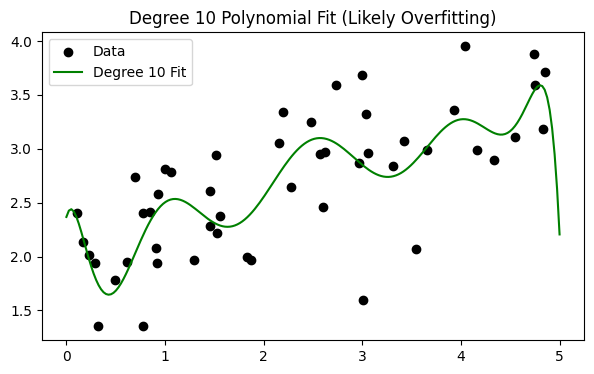

In [52]:
# Fit polynomial of degree 10
coeffs_deg10 = np.polyfit(X, y_noisy, deg=10)
poly_deg10 = np.poly1d(coeffs_deg10)


coeffs_deg10_rounded = np.round(coeffs_deg10, decimals=1)

for degree, coeff in enumerate(coeffs_deg10_rounded):
	print(f"Coefficient for degree {degree}: {coeff}")

# Evaluate on the same smooth grid
y_deg10 = poly_deg10(X_smooth)

# Plot
plt.figure(figsize=(7,4))
plt.scatter(X, y_noisy, color='black', label='Data')
plt.plot(X_smooth, y_deg10, color='green', label='Degree 10 Fit')
plt.title("Degree 10 Polynomial Fit (Likely Overfitting)")
plt.legend()
plt.show()


# L1 vs L2 Normalisations!!!

L1 Updates:
Update 1: Weight = 0.999
Update 101: Weight = 0.8989999999999999
Update 201: Weight = 0.7989999999999998
Update 301: Weight = 0.6989999999999997
Update 401: Weight = 0.5989999999999996
Update 501: Weight = 0.49899999999999956
Update 601: Weight = 0.39899999999999947
Update 701: Weight = 0.2989999999999994
Update 801: Weight = 0.1989999999999993
Update 901: Weight = 0.0989999999999992

L2 Updates:
Update 1: Weight = 0.998
Update 101: Weight = 0.8169296710790512
Update 201: Weight = 0.6687115105103475
Update 301: Weight = 0.5473850444168271
Update 401: Weight = 0.44807122674251537
Update 501: Weight = 0.36677623234744494
Update 601: Weight = 0.30023084854830817
Update 701: Weight = 0.24575900636508394
Update 801: Weight = 0.20117016456366976
Update 901: Weight = 0.16467121880552835


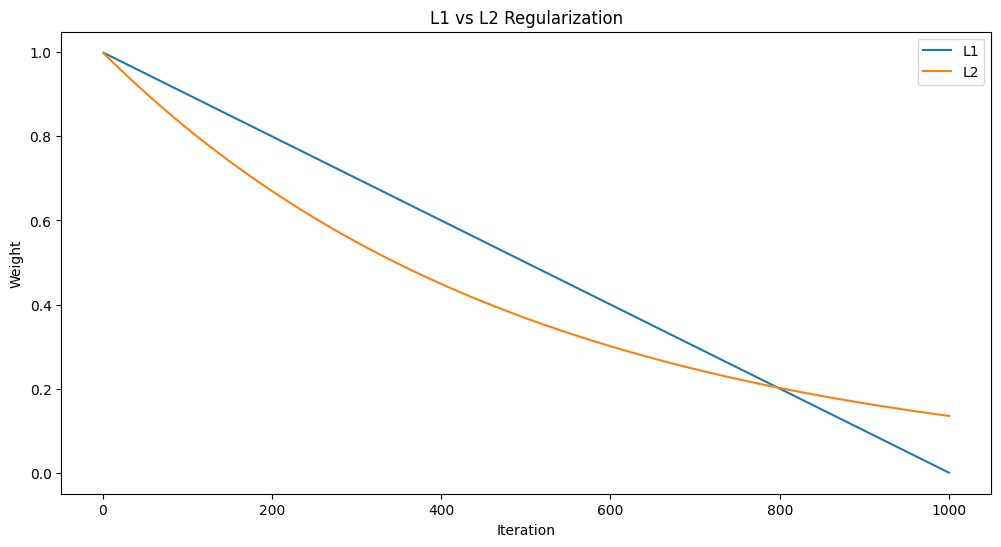

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
np.set_printoptions(suppress=True)  # Suppress scientific notation

def update_weight_l1(w, step_size):
    return w - step_size * np.sign(w)

def update_weight_l2(w, step_size):
    return w - step_size * (2 * w)


# Starting weight
orig_wt = 1
w = deepcopy(orig_wt)
step_size = 0.001
num_iterations = 1000
div_by = 100


# Performing 10 updates under both L1 and L2
store_w1 = []
print("L1 Updates:")
for i in range(num_iterations):
    w = update_weight_l1(w, step_size)
    if i % div_by == 0:
        print(f"Update {i+1}: Weight = {w}")

    store_w1.append(w)

store_w2 = []
w = deepcopy(orig_wt)  # Resetting weight for L2
print("\nL2 Updates:")
for i in range(num_iterations):
    w = update_weight_l2(w, step_size)
    if i % div_by == 0:
        print(f"Update {i+1}: Weight = {w}")

    store_w2.append(w)


plt.figure(figsize=(12, 6))
plt.plot(range(1, num_iterations+1), store_w1, label='L1')
plt.plot(range(1, num_iterations+1), store_w2, label='L2')
plt.title('L1 vs L2 Regularization')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.legend()
plt.show()



# types of regularization and when to use them??!!! learn it from the ipynb code book!!!

# Regularization Experiment!!!

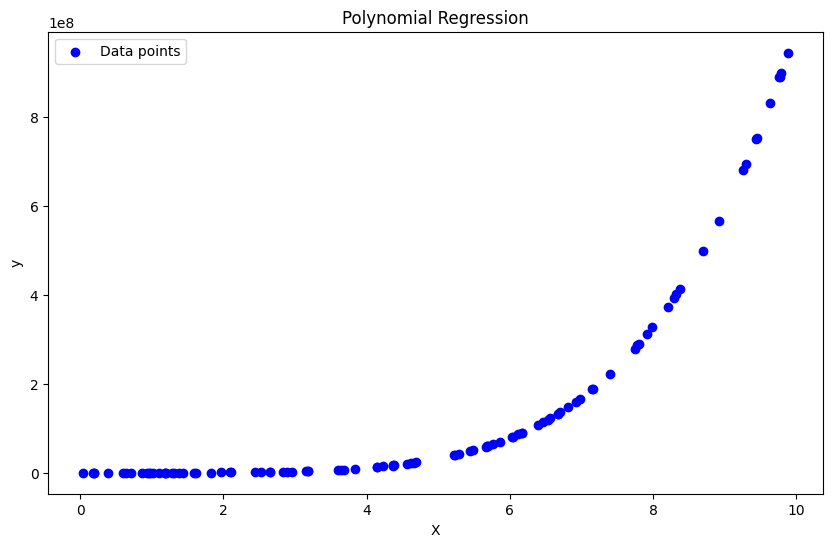

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate some data
np.random.seed(0)
X = 10 * np.random.rand(100, 1)  # X values in the range [0, 10]
y = 1e4 * np.sin(X) + 1e4 * X - 200 * X**2 + 1500 * X**3 - 50 * X**4 + 10000* X**5


# Add some noise
y += 1e5 * np.random.randn(100, 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


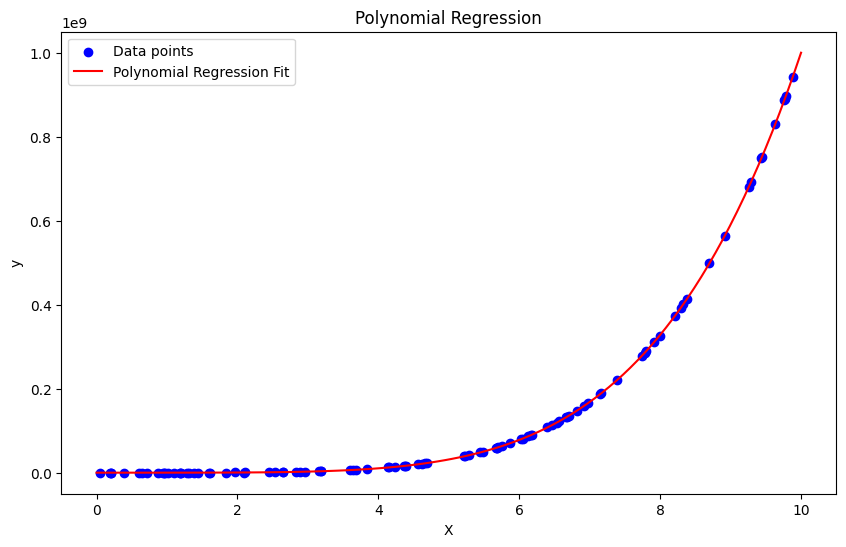

In [55]:
# Create a polynomial regression model of degree 5
degree = 5
# polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# don't use make_pipeline, because we want to access the PolynomialFeatures object
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
polyreg = LinearRegression()
polyreg.fit(X_poly, y)

plt.figure(figsize=(10, 6))
X_fit = np.linspace(0, 10, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = polyreg.predict(X_fit_poly)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [56]:
coefs = polyreg.coef_
# create a dataframe with the coefficients

df = pd.DataFrame()
#suppress scientific notation pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Coefficient'] = coefs.flatten()
df['Degree'] = df.index
df['Degree'] = df['Degree'] - 1
df = df.iloc[1:]
df


,Coefficient,Degree
1,53475.85,0
2,-13307.31,1
3,3079.50,2
4,-119.35,3
5,9999.92,4


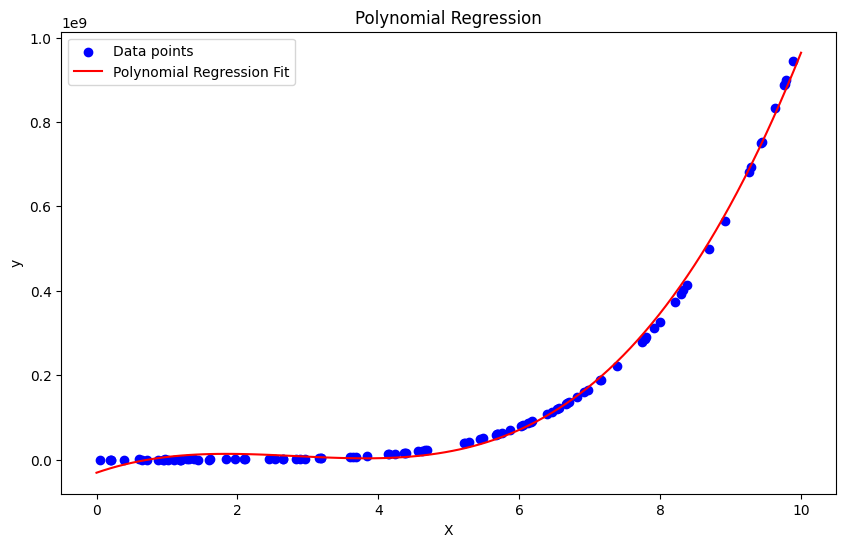

In [57]:
# Create a polynomial regression model of degree 5
degree = 3
# polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# don't use make_pipeline, because we want to access the PolynomialFeatures object
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
polyreg = LinearRegression()
polyreg.fit(X_poly, y)

plt.figure(figsize=(10, 6))
X_fit = np.linspace(0, 10, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = polyreg.predict(X_fit_poly)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [58]:
coefs = polyreg.coef_
# create a dataframe with the coefficients

df = pd.DataFrame()
#suppress scientific notation pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Coefficient'] = coefs.flatten()
df['Degree'] = df.index
df['Degree'] = df['Degree'] - 1
df = df.iloc[1:]
df

,Coefficient,Degree
1,57876275.59,0
2,-23306722.69,1
3,2747216.30,2


# Implementation of L1 and L2

In [59]:
from sklearn import datasets

data = datasets.load_diabetes()

X = data['data']

y = data['target']

X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Transform the features into polynomial features
from sklearn.preprocessing import PolynomialFeatures
degree = 8
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [62]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)

In [64]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 89170.46499127525
MSE for train: 2.1449785382148774e-24


In [65]:
print("R^2 for train:",model.score(X_train_poly_scaled,y_train))
print('R^2 for test:',model.score(X_test_poly_scaled,y_test))

R^2 for train: 1.0
R^2 for test: -15.830485275594754


In [66]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=0.001)    # Alpha is the regularization strength

# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+03, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


test MSE for L1: 56375.166621619835
test MSE for L2: 89127.31439266077


In [67]:
print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

R^2 for lasso: -9.640534529310903
R^2 for ridge: -15.822340813023146


In [68]:
lasso_model = Lasso(alpha=1e10)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1e10)    # Alpha is the regularization strength

# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

test MSE for L1: 5361.533457238513
test MSE for L2: 5361.437117416974
R^2 for lasso: -0.011962984778542296
R^2 for ridge: -0.011944801112593773


In [69]:
lasso_model = Lasso(alpha=1e1)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1e3)    # Alpha is the regularization strength

# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

test MSE for L1: 2853.8774245650693
test MSE for L2: 3999.5295195330687
R^2 for lasso: 0.4613447179265656
R^2 for ridge: 0.24510853796272003


In [70]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [71]:
elastic_net = ElasticNet(alpha=1e3)    # Alpha is the regularization strength


In [72]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(8), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

# Cross validation!!!

In [73]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

In [74]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
kf = KFold(n_splits=10)

In [75]:
# Performing k-fold cross validation
degrees = 11 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = polyreg_scaled.score(X_train, y_train)
        val_score= polyreg_scaled.score(X_val, y_val)

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

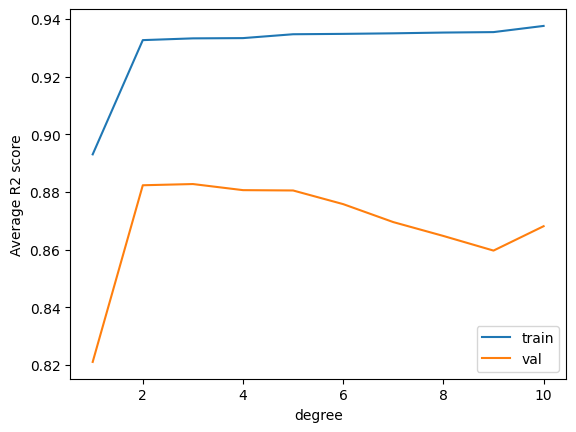

In [76]:
plt.figure()
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

# Logistics regression!!!

In [77]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 90.8MB/s]


In [78]:
pd.options.display.max_columns = 500

In [79]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.10,197.40,244.70,10.00,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.60,195.50,254.40,13.70,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.40,121.20,162.60,12.20,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.40,61.90,196.90,6.60,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.70,148.30,186.90,10.10,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [80]:
churn['Churn'].value_counts()


,count
Churn,
0,2850
1,2850


In [81]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [82]:
import numpy as np


cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape
X = churn[cols]
X.shape

(5700, 5)

In [83]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [86]:
print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[0.68445262 0.29104301 0.1363756  0.79630985 0.06125924]]
intercept =  [-0.01220319]


In [87]:
def accuracy(y_true, y_pred):
  y_true = y_true.reshape(len(y_true))
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [88]:
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [89]:
accuracy(y_val, model.predict(X_val))

0.6982456140350877

# Logistics Regression - 2
# tuning the right value of c

In [90]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

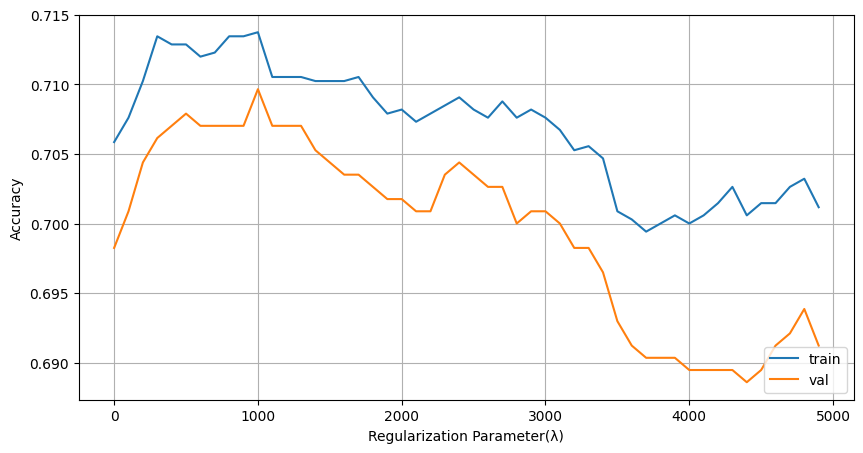

In [91]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# log rig multi class classification!!!

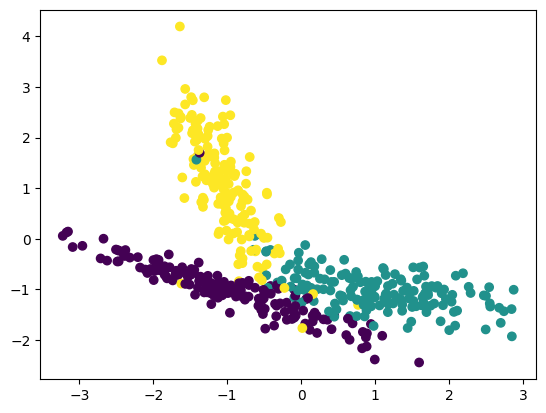

In [92]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [93]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [94]:
model = LogisticRegression(multi_class='ovr')

model.fit(X_train, y_train)


print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


<ipython-input-95-aa3a84c38b50>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


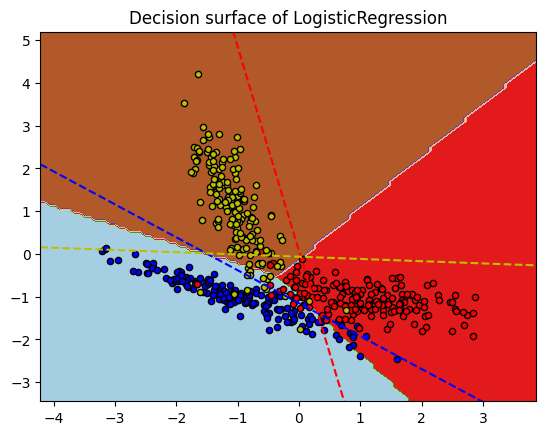

In [95]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

# Ridge regression!!! for multicolinearity

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(123)

# 1) Small dataset
N = 30

# 2) Generate features
X1 = np.random.randn(N)
X2 = X1 + 0.01 * np.random.randn(N)  # nearly the same as X1
X3 = X1 + 0.01 * np.random.randn(N)  # again, nearly the same
X4 = X1 + 0.01 * np.random.randn(N)  # again, nearly the same
X5 = np.random.randn(N)              # distinct feature, uncorrelated

# 3) True relationship (some arbitrary weights)
#    y = 3*X1 + 3*X2 + 3*X3 + 0.5*X4 + 2*X5 + noise
noise = 0.3 * np.random.randn(N)
y = 3*X1 + 3*X2 + 3*X3 + 0.5*X4 + 2*X5 + noise

df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4,
    'X5': X5,
    'y':  y
})

# Check correlation matrix
corr = df[['X1','X2','X3','X4','X5']].corr()
print("Feature Correlation Matrix:")
print(corr)


Feature Correlation Matrix:
      X1    X2    X3    X4    X5
X1  1.00  1.00  1.00  1.00 -0.17
X2  1.00  1.00  1.00  1.00 -0.17
X3  1.00  1.00  1.00  1.00 -0.17
X4  1.00  1.00  1.00  1.00 -0.17
X5 -0.17 -0.17 -0.17 -0.17  1.00


In [97]:
# Prepare data
X = df[['X1','X2','X3','X4','X5']]
y = df['y']

# OLS
ols = LinearRegression().fit(X, y)
ols_coefs = ols.coef_
ols_intercept = ols.intercept_
ols_preds = ols.predict(X)
ols_mse = mean_squared_error(y, ols_preds)

print("===== OLS RESULTS =====")
print("Coefficients:", ols_coefs)

===== OLS RESULTS =====
Coefficients: [ 2.96103559  8.5753909  -5.53612335  3.53548576  1.88519053]


In [98]:
# Ridge (try alpha=10 for stronger regularization)
ridge = Ridge(alpha=10.0).fit(X, y)
ridge_coefs = ridge.coef_
ridge_intercept = ridge.intercept_
ridge_preds = ridge.predict(X)
ridge_mse = mean_squared_error(y, ridge_preds)

print("\n===== RIDGE RESULTS =====")
print("Coefficients:", ridge_coefs)


===== RIDGE RESULTS =====
Coefficients: [2.22249668 2.22963069 2.21949665 2.22038585 1.15101672]


# Buisness case

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 37.6MB/s]


In [101]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [102]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 119MB/s]


In [103]:
dt = pd.read_csv('Spam_finalData.csv')
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.03,-0.00,-0.07,0.05,0.06,0.05,-0.07,-0.00,-0.04,0.02,-0.02,-0.01,-0.02,-0.03,0.05
1,0,-0.12,0.11,0.46,0.00,0.01,0.01,-0.01,-0.05,0.04,0.00,0.01,0.02,-0.01,0.06,0.08
2,0,-0.08,-0.08,-0.05,-0.05,-0.02,-0.05,-0.00,-0.00,0.01,-0.02,0.01,-0.01,-0.04,-0.05,0.03
3,1,-0.08,-0.06,-0.03,-0.04,-0.00,-0.03,0.02,-0.01,-0.01,0.00,0.01,0.03,0.00,-0.02,-0.01
4,0,-0.05,0.03,-0.09,-0.05,-0.03,0.09,-0.11,-0.05,-0.01,0.02,0.06,0.01,0.04,0.02,-0.01


In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

In [105]:
X_train.shape

(3878, 15)

In [106]:
X_test.shape

(1293, 15)

In [107]:
dt.shape

(5171, 16)

In [108]:
3878/1293

2.99922660479505

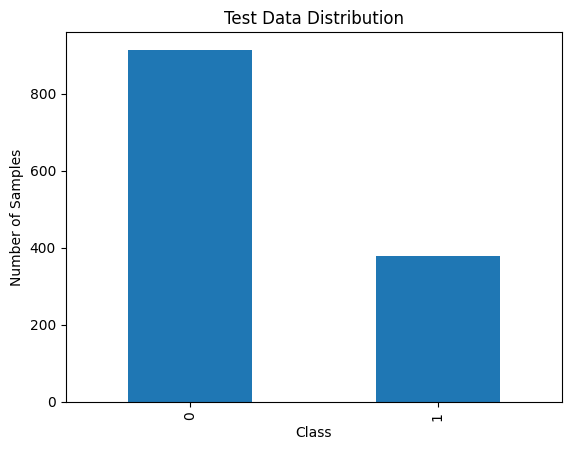

In [109]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [110]:
y_test.value_counts()/ y_test.value_counts().sum()

,count
label_num,
0,0.71
1,0.29


In [111]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [112]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9195668986852281


In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[841,  73],
       [ 31, 348]])

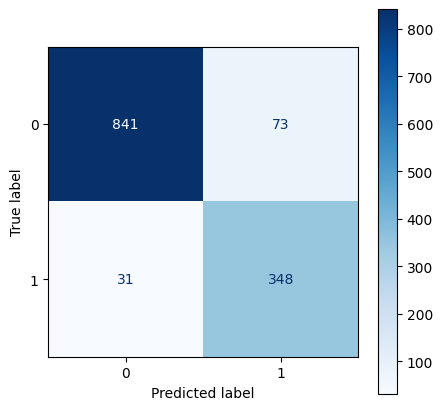

In [114]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax, cmap='Blues')

In [115]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9195668986852281

In [116]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(f'precision Score:{precision_score(y_test,y_pred)}')

print(f'recall Score:{recall_score(y_test,y_pred)}')

print(f'f1Score:{f1_score(y_test,y_pred)}')

precision Score:0.8266033254156769
recall Score:0.9182058047493403
f1Score:0.87


In [118]:
def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score

In [119]:
y_test.value_counts()

,count
label_num,
0,914
1,379


In [120]:
933/360

2.591666666666667

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [122]:
model = LogisticRegression(class_weight={0:1,1:2.59})


f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8427434634331186, Testing F1 score:0.8445945945945946


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
label_num
0    2758
1    1120
Name: count, dtype: int64
After Oversampling
label_num
1    2758
0    2758
Name: count, dtype: int64
Training F1 score:0.9280027104861934, Testing F1 score:0.8445945945945946


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before SMOTE
label_num
0    2758
1    1120
Name: count, dtype: int64
After Oversampling
label_num
1    2758
0    2758
Name: count, dtype: int64
Training F1 score:0.9561078794288737, Testing F1 score:0.8975609756097561
